In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
import pandas as pd

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


In [ ]:
X = iris.data
Y = iris.target

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
Y_1hot = enc.fit_transform(Y.reshape(-1, 1)).toarray()
print(Y[0], " -- one hot enocding --> ", Y_1hot[0])
print(Y[50], " -- one hot enocding --> ", Y_1hot[50])
print(Y[100], " -- one hot enocding --> ", Y_1hot[100])

0  -- one hot enocding -->  [1. 0. 0.]
1  -- one hot enocding -->  [0. 1. 0.]
2  -- one hot enocding -->  [0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y_1hot, random_state=42, test_size=0.4, shuffle=True)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, random_state=42, test_size=0.5)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras import optimizers

model = Sequential()
model.add(Dense(4, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.01),
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=10,
                    validation_data=(x_val,y_val))

Epoch 1/20
9/9 [==============================] - 1s 22ms/step - loss: 0.7772 - accuracy: 0.5444 - val_loss: 0.6217 - val_accuracy: 0.5333
Epoch 2/20
9/9 [==============================] - 0s 5ms/step - loss: 0.6285 - accuracy: 0.5444 - val_loss: 0.5592 - val_accuracy: 0.5667
Epoch 3/20
9/9 [==============================] - 0s 8ms/step - loss: 0.5645 - accuracy: 0.6111 - val_loss: 0.5212 - val_accuracy: 0.5667
Epoch 4/20
9/9 [==============================] - 0s 4ms/step - loss: 0.5436 - accuracy: 0.5667 - val_loss: 0.5048 - val_accuracy: 0.5667
Epoch 5/20
9/9 [==============================] - 0s 6ms/step - loss: 0.5136 - accuracy: 0.6889 - val_loss: 0.5186 - val_accuracy: 0.5667
Epoch 6/20
9/9 [==============================] - 0s 5ms/step - loss: 0.4978 - accuracy: 0.6556 - val_loss: 0.4753 - val_accuracy: 0.5667
Epoch 7/20
9/9 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.7444 - val_loss: 0.4922 - val_accuracy: 0.5667
Epoch 8/20
9/9 [=================

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

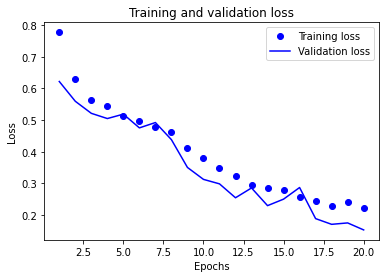

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()